In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
playersDataset = pd.read_csv("LaLiga_Players_2122.csv")
playersDataset.head()

,competition,player.url,id,slug,name,nickname,firstname,lastname,gender,date_of_birth,...,unsuccessful_crosses_open_play,unsuccessful_dribbles,unsuccessful_launches,unsuccessful_layoffs,unsuccessful_long_passes,unsuccessful_passes_opposition_half,unsuccessful_passes_own_half,unsuccessful_short_passes,winning_goal,yellow_cards
0,LaLiga Santander,https://www.laliga.com/en-ES/player/aaron,1307,aaron,Aarón Escandell,Aarón,Aarón,Escandell,male,1995-09-27T00:00:00+00:00,...,NaN,NaN,21.0,NaN,55.0,49.0,7.0,1.0,0.0,1.0
1,LaLiga Santander,https://www.laliga.com/en-ES/player/abqar,8715,abqar,Abdelkabir Abqar,Abqar,Abdelkabir,Abqar,male,1999-03-10T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LaLiga Santander,https://www.laliga.com/en-ES/player/abdessamad...,13770,abdessamad-ezzalzouli,Abdessamad Ezzalzouli,Abde,Abdessamad,Ezzalzouli,male,2001-12-17T00:00:00+00:00,...,13.0,25.0,NaN,NaN,NaN,45.0,8.0,40.0,0.0,4.0
3,LaLiga Santander,https://www.laliga.com/en-ES/player/abdon,200,abdon,Abdón Prats,Abdon,Abdón,Prats,male,1992-12-07T00:00:00+00:00,...,2.0,4.0,1.0,4.0,2.0,41.0,11.0,48.0,1.0,4.0
4,LaLiga Santander,https://www.laliga.com/en-ES/player/adama,536,adama,Adama Traoré,Adama,Adama,Traoré,male,1996-01-25T00:00:00+00:00,...,27.0,11.0,1.0,NaN,1.0,40.0,6.0,18.0,0.0,NaN


In [4]:
# Sum of null values in each of the columns
nullValuesSum = playersDataset.isnull().sum()
print(nullValuesSum)

competition                              0
player.url                               0
id                                       0
slug                                     0
name                                     0
                                      ... 
unsuccessful_passes_opposition_half    800
unsuccessful_passes_own_half           842
unsuccessful_short_passes              825
winning_goal                           421
yellow_cards                           775
Length: 150, dtype: int64


In [5]:
# Fill null values with 0s
playersDataset.fillna(0, inplace=True)

In [6]:
# Checking that there are no longer null values
nullValuesSum = playersDataset.isnull().sum()
print(nullValuesSum)

competition                            0
player.url                             0
id                                     0
slug                                   0
name                                   0
                                      ..
unsuccessful_passes_opposition_half    0
unsuccessful_passes_own_half           0
unsuccessful_short_passes              0
winning_goal                           0
yellow_cards                           0
Length: 150, dtype: int64


In [7]:
# Minimized dataset with the values of interest
playersDatasetMinimized = playersDataset[["competition", "name", "weight", "height", "position", "gender", "team", "stadium", "international", "games_played", "goals", "total_shots"]]
playersDatasetMinimized.head()

,competition,name,weight,height,position,gender,team,stadium,international,games_played,goals,total_shots
0,LaLiga Santander,Aarón Escandell,71.0,185.0,Goalkeeper,male,Granada CF,Nuevo Los Cármenes,False,4.0,0.0,0.0
1,LaLiga Santander,Abdelkabir Abqar,80.0,188.0,Defender,male,Deportivo Alavés,Mendizorroza,False,0.0,0.0,0.0
2,LaLiga Santander,Abdessamad Ezzalzouli,0.0,0.0,Forward,male,FC Barcelona,Camp Nou,False,10.0,1.0,10.0
3,LaLiga Santander,Abdón Prats,81.0,181.0,Forward,male,RCD Mallorca,Visit Mallorca Estadi,False,23.0,3.0,14.0
4,LaLiga Santander,Adama Traoré,86.0,178.0,Forward,male,FC Barcelona,Camp Nou,False,11.0,0.0,7.0


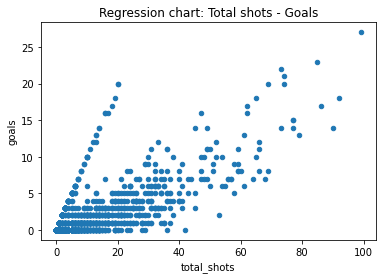

In [8]:
# Regression has been used to model the relationship between an independent variable (such as total shots) and a dependent variable (such as goals).
playersDatasetMinimized.plot(kind = 'scatter', x = 'total_shots', y = 'goals')
plt.title("Regression chart: Total shots - Goals")
plt.show()

In [9]:
# Clustering chart using KMeans Algorithm
totalGames = playersDatasetMinimized['games_played'].values
totalGoals = playersDatasetMinimized['goals'].values
colors = ['red', 'green', 'blue', 'cyan', 'yellow']
assign = []

x = np.array(playersDatasetMinimized[['games_played', 'goals']])
kmeans = KMeans(n_clusters = 5).fit(x)
C = kmeans.cluster_centers_

labels = kmeans.predict(x)
for row in labels:
    assign.append(colors[row])

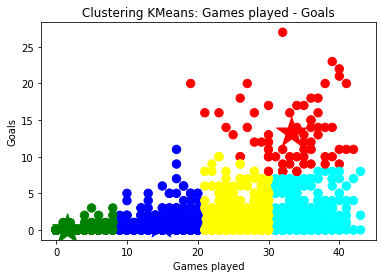

In [10]:
plt.scatter(totalGames, totalGoals, c = assign, s = 70)
plt.xlabel('Games played')
plt.ylabel('Goals')
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = colors, s = 1000)
plt.title("Clustering KMeans: Games played - Goals")
plt.show()